In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\aaron\Downloads\movies.csv')

In [2]:
# Look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Missing data evaluation

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Looking at data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Getting rid of the 0 after the decimal point in the budget column
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [9]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [10]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [11]:
# Correcting the Year column
df['correctyear']=df['released'].astype(str).str[0:4]

In [12]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,July
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,June
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000.0,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0,May
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,Augu
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,Apri


In [ ]:
# Want to use this data to identify what has a high correlation to success - success may be objective but the rate of success
# will be measured by gross.
# My predictions are budget and company have a high correlation to gross revenue.

In [14]:
# Checking to see if we have any duplicates and drop them if we do
df['company'].drop_duplicates().sort_values(ascending=False)
# This code is just showing us all the unique/distinct values

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [ ]:
# Want to see what piece of data will correlate with the gross income
# My predictions are that budget, genre, and company will have a high correlation to the gross income of the movie

<function matplotlib.pyplot.show(close=None, block=None)>

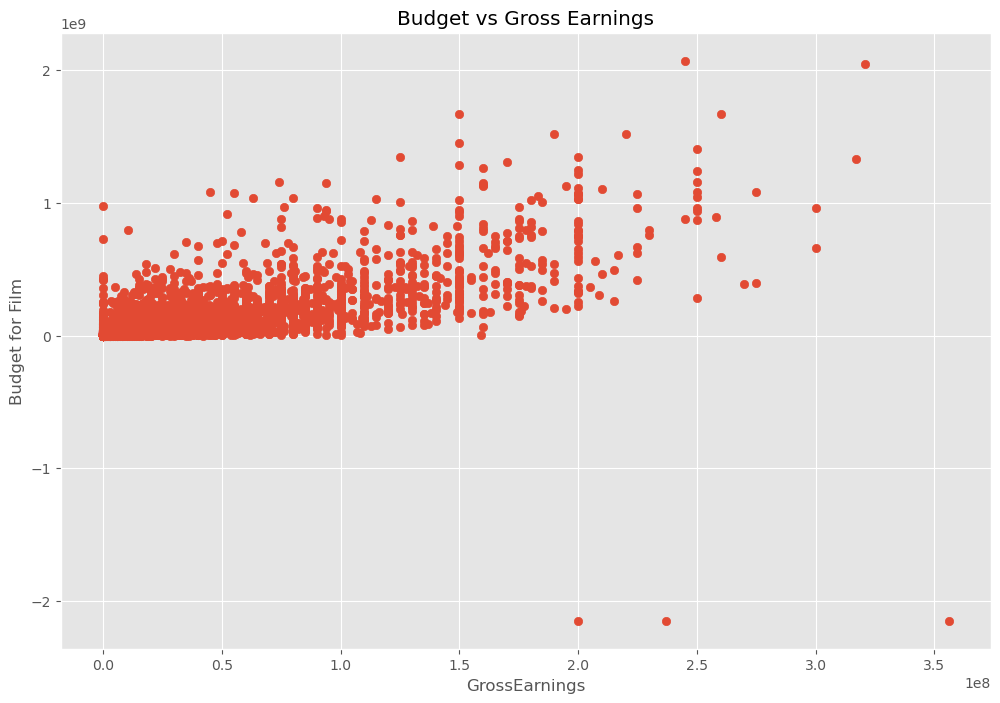

In [19]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('GrossEarnings')
plt.ylabel('Budget for Film')
plt.show

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


<AxesSubplot:xlabel='budget', ylabel='gross'>

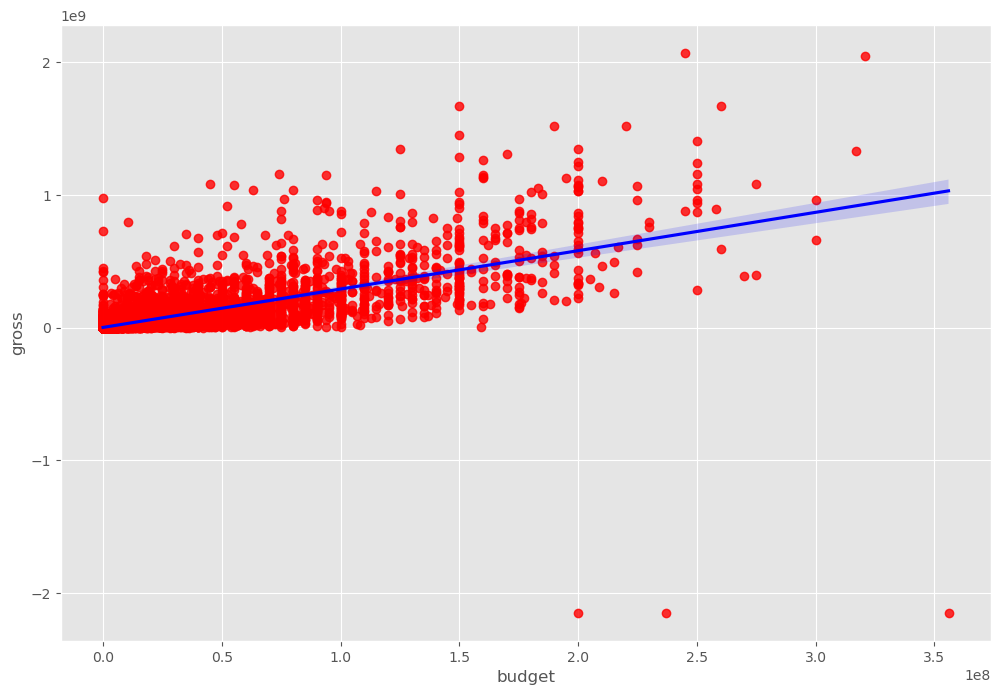

In [21]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [22]:
# The line going up does show a correlation to what degree needs to be more investigated.
# Looking at the correlation more in depth.
df.corr(method='pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


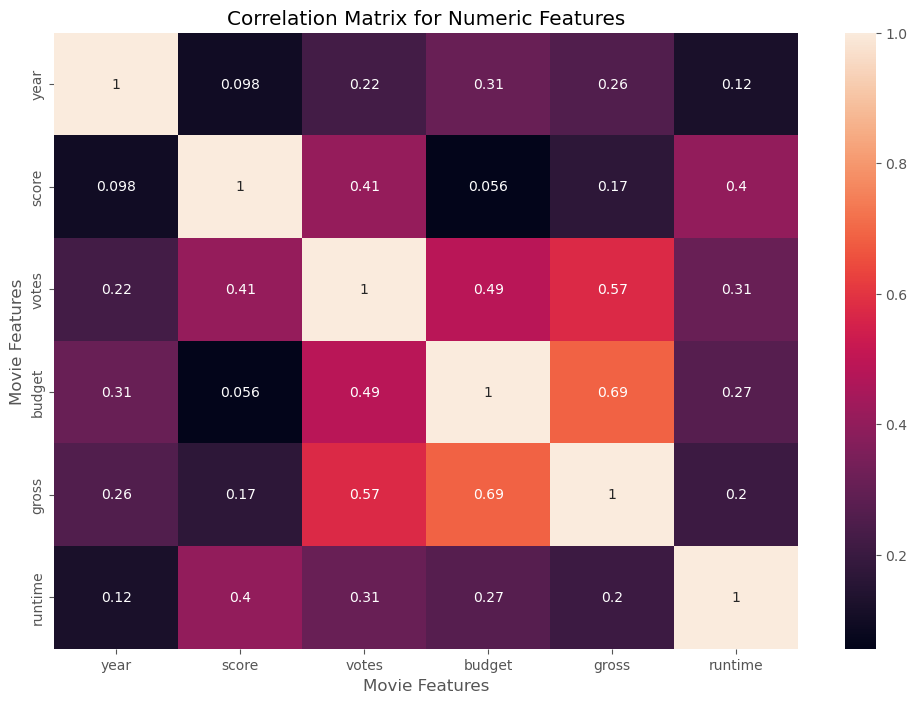

In [26]:
# Through the pearson method you can see that there is a high correlation between budget and gross revenue
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [33]:
# Does company correlate with gross revenue?

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,18
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0,539,90.0,11
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,8
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,18


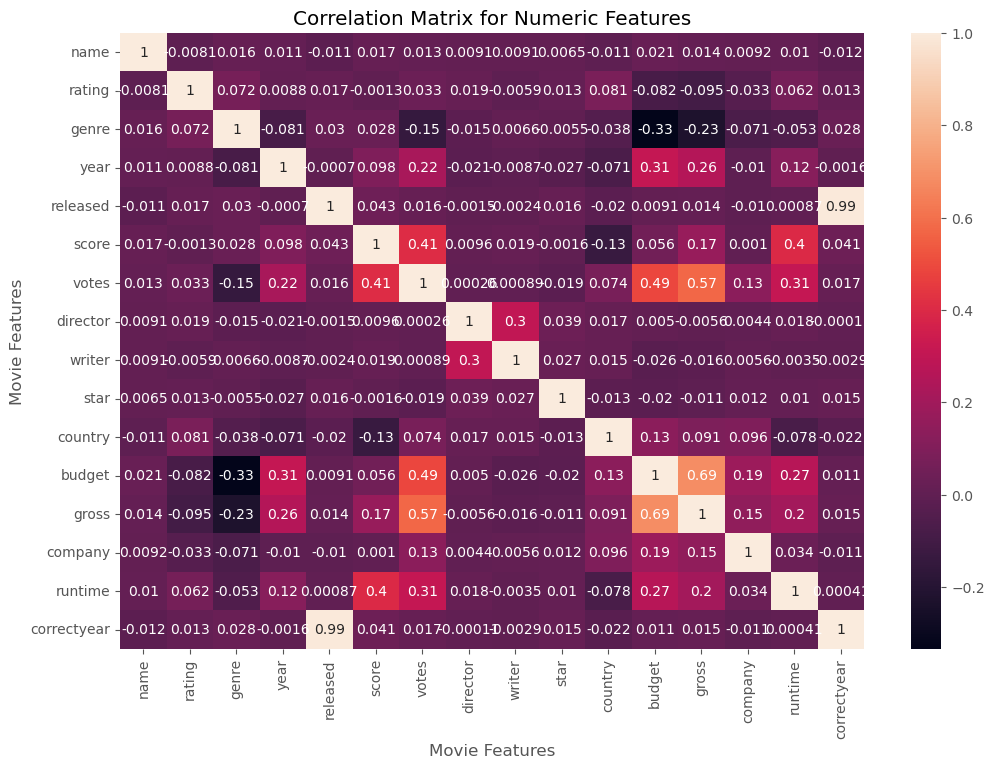

In [34]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [35]:
df.numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010474,0.000868,0.993694
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451,0.040993
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212,0.017337
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174,0.015406


In [36]:
correlation_mat = df.numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
                              ...   
correctyear  budget         0.010544
             gross          0.015338
             company       -0.010726
             runtime        0.000410
             correctyear    1.000000
Length: 256, dtype: float64

In [37]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.229534
genre        gross         -0.229534
             votes         -0.145307
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
Length: 256, dtype: float64

In [38]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.573889
gross        votes          0.573889
             budget         0.687124
budget       gross          0.687124
released     correctyear    0.993694
correctyear  released       0.993694
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [ ]:
# Instead of company having a high correlation it appears that votes and budget have a high correlation to gross revenue.